# taiyo nifty dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [21]:
df = pd.read_csv("nifty.csv",sep=';', 
                              encoding='utf-8', 
                              thousands=',',
                              na_values='None')

In [22]:
sns.set_context('talk')
matplotlib.rcParams['font.family'] = 'arial'

In [24]:
del df['Unnamed: 0']
df['price_bookvalue'] = np.round(df.current_value / df.book_value, 2)
df['peg3'] = df.price_earnings / df.sales_growth_3yr
""

''

In [25]:
df.head()

,company,industry,symbol,category,market_cap,current_value,high_52week,low_52week,book_value,price_earnings,dividend_yield,roce,roe,sales_growth_3yr,price_bookvalue,peg3
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,Nifty 50,69087.0,333.60,451.55,293.95,90.36,28.32,0.60,14.96,14.82,18.67,3.69,1.516872
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,Nifty 50,119612.0,1247.00,1488.60,1082.00,84.29,58.50,0.70,38.71,25.47,8.44,14.79,6.931280
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,Nifty 50,156906.0,610.65,676.90,477.50,246.92,5525.00,0.00,4.40,0.11,8.87,2.47,622.886133
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,Nifty 50,76907.0,2658.00,3472.60,2425.00,654.55,17.89,2.26,31.96,22.63,5.20,4.06,3.440385
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,Nifty 50,137747.0,2383.00,2995.10,1514.40,300.47,42.21,0.17,12.74,20.27,35.08,7.93,1.203250


In [26]:
df = df.fillna(0)

In [27]:
print(df.keys())

Index(['company', 'industry', 'symbol', 'category', 'market_cap',
       'current_value', 'high_52week', 'low_52week', 'book_value',
       'price_earnings', 'dividend_yield', 'roce', 'roe', 'sales_growth_3yr',
       'price_bookvalue', 'peg3'],
      dtype='object')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           500 non-null    object 
 1   industry          500 non-null    object 
 2   symbol            500 non-null    object 
 3   category          500 non-null    object 
 4   market_cap        500 non-null    float64
 5   current_value     500 non-null    float64
 6   high_52week       500 non-null    float64
 7   low_52week        500 non-null    float64
 8   book_value        500 non-null    float64
 9   price_earnings    500 non-null    float64
 10  dividend_yield    500 non-null    float64
 11  roce              500 non-null    float64
 12  roe               500 non-null    float64
 13  sales_growth_3yr  500 non-null    float64
 14  price_bookvalue   500 non-null    float64
 15  peg3              500 non-null    float64
dtypes: float64(12), object(4)
memory usage: 62.6

In [29]:
df.describe()

,market_cap,current_value,high_52week,low_52week,book_value,price_earnings,dividend_yield,roce,roe,sales_growth_3yr,price_bookvalue,peg3
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25991.8387,1065.163000,1421.213800,857.061020,237.421580,64.022020,1.138540,17.327580,11.939060,10.075680,4.702160,6.331227
std,65032.3477,3877.630761,4820.334557,3272.091488,1048.393085,393.400143,1.538234,17.801213,19.665729,22.724763,5.401268,42.482506
min,203.5500,2.000000,0.000000,0.000000,-637.500000,0.000000,0.000000,-195.000000,-199.000000,-76.740000,-2.140000,-296.068182
25%,3472.5000,132.475000,216.412500,105.912500,53.582500,12.710000,0.190000,7.680000,5.967500,1.847500,1.647500,0.418299
50%,7465.5000,321.950000,508.800000,258.250000,103.120000,24.090000,0.640000,14.940000,13.460000,7.365000,3.175000,2.162324
75%,21301.0000,785.362500,1097.412500,639.287500,203.055000,42.615000,1.422500,23.552500,19.470000,13.552500,5.785000,5.302516
max,718000.0000,66481.000000,81423.000000,59494.600000,22651.000000,6604.000000,13.830000,109.000000,84.640000,241.000000,50.620000,622.886133


In [30]:
import matplotlib.pyplot as plt

In [31]:
import time
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib
import warnings
warnings.filterwarnings('ignore')


In [32]:
sns.set_context('talk')
matplotlib.rcParams['font.family'] = 'arial'

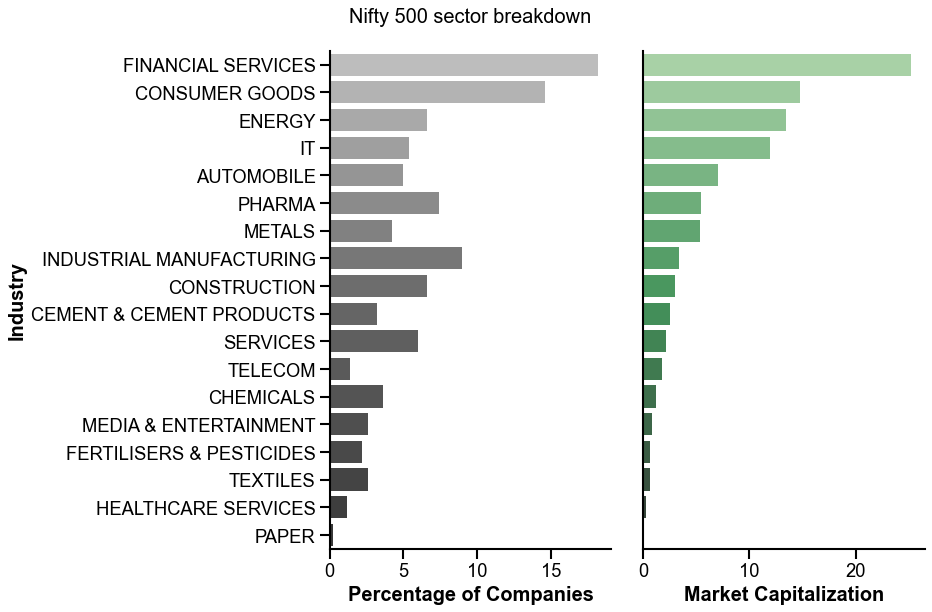

In [33]:
f = {'market_cap':['sum'], 'company':['count']}

industries = df.groupby('industry').agg(f)
industries.columns = industries.columns.get_level_values(0)
industries = industries.reset_index()
industries['company'] = 100*industries['company'] / industries['company'].sum()
industries['market_cap'] = 100*industries['market_cap'] / industries['market_cap'].sum()
industries = industries.sort_values('market_cap', ascending=False)

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="company", y="industry", data=industries, palette=("Greys_d"))
ax1.set_xlabel('Percentage of Companies', weight='bold')
ax1.set_ylabel('Industry', weight = 'bold')
ax1.set_title('Nifty 500 sector breakdown\n')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="market_cap", y="industry", data=industries, palette=("Greens_d"))
ax2.set_xlabel('Market Capitalization', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

In [34]:

ind_ratio = pd.DataFrame(df.groupby('industry')['price_earnings'].quantile(.8)).reset_index()
ind_ratio = ind_ratio.rename(columns = {'price_earnings': 'ind_pe80'})
df = pd.merge(df, ind_ratio,  how='left', left_on=['industry'], right_on = ['industry'])

# Above avg ROCE and ROE
ind_ratio = pd.DataFrame(df.groupby('industry')['roce', 'roe'].mean()).reset_index()
ind_ratio = ind_ratio.rename(columns = {'roce': 'ind_roce50',
                                       'roe': 'ind_roe50'})
df = pd.merge(df, ind_ratio,  how='left', left_on=['industry'], right_on = ['industry'])

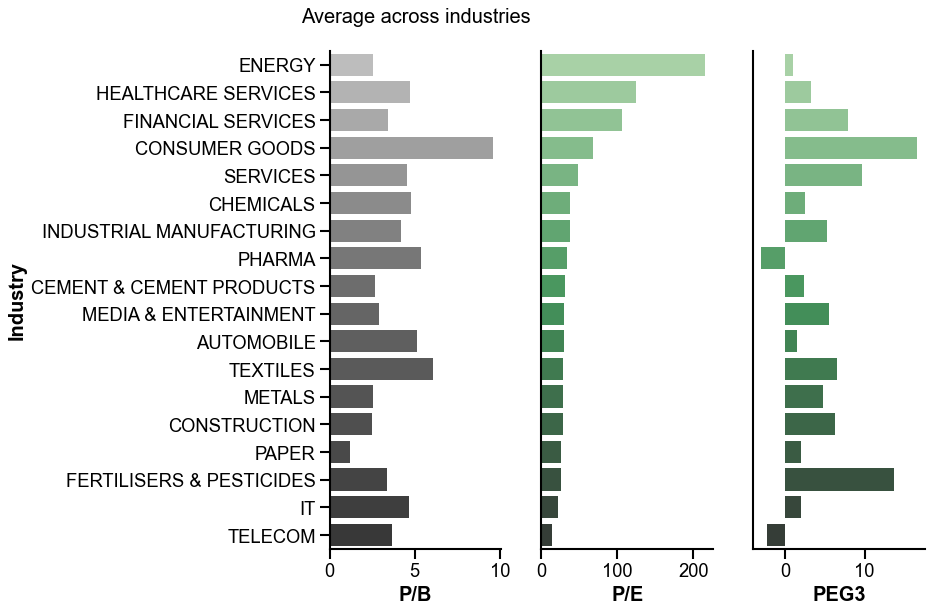

In [35]:
f = {'price_bookvalue':['mean'], 'price_earnings':['mean'], 'peg3':['mean']}

ratios = df.groupby('industry').agg(f)
ratios.columns = ratios.columns.get_level_values(0)
ratios = ratios.reset_index()
ratios = ratios.sort_values('price_earnings', ascending=False)

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="price_bookvalue", y="industry", data=ratios, palette=("Greys_d"))
ax1.set_xlabel('P/B', weight='bold')
ax1.set_ylabel('Industry', weight = 'bold')
ax1.set_title('Average across industries\n')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="price_earnings", y="industry", data=ratios, palette=("Greens_d"))
ax2.set_xlabel('P/E', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="peg3", y="industry", data=ratios, palette=("Greens_d"))
ax2.set_xlabel('PEG3', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

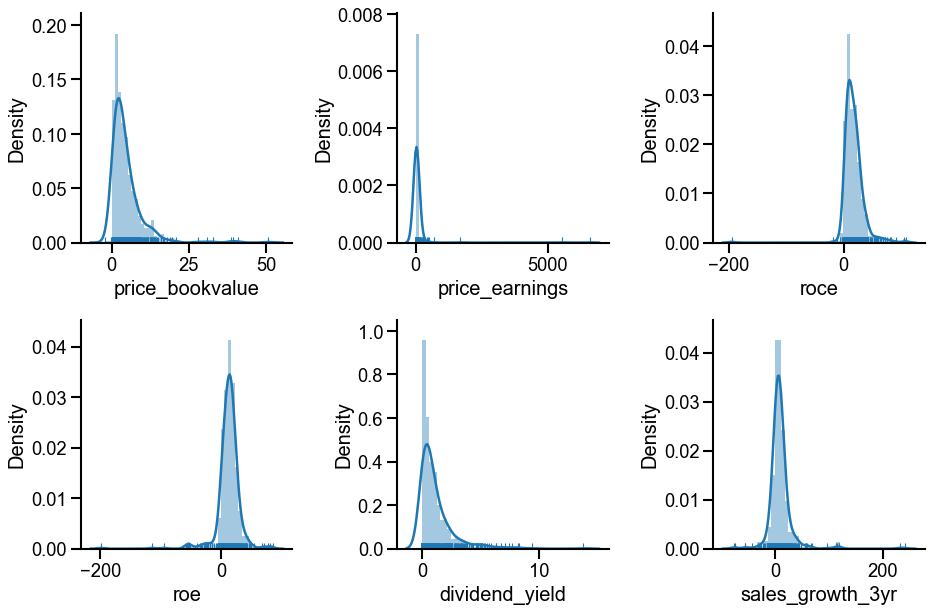

In [37]:
from scipy.stats import norm

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
ax1 = sns.distplot(df.price_bookvalue, rug=True, kde=True) 

plt.subplot(2, 3, 2)
ax2 = sns.distplot(df.price_earnings, rug=True, kde=True) 

plt.subplot(2, 3, 3)
ax3 = sns.distplot(df.roce, rug=True, kde=True) 

plt.subplot(2, 3, 4)
ax4 = sns.distplot(df.roe, rug=True, kde=True) 

plt.subplot(2, 3, 5)
ax5 = sns.distplot(df.dividend_yield, rug=True, kde=True) 

plt.subplot(2, 3, 6)
ax6 = sns.distplot(df.sales_growth_3yr, rug=True, kde=True) 

sns.despine()
plt.tight_layout();

In [41]:
print("Number of stocks by market capitalization:")
display(df.groupby('category')['company'].size())

# Nifty 50 
print("Nifty 50:")
display(df[(df.category == 'Nifty 50')].symbol.values)

# Nifty Next 50
print("Nifty Next 50:")
display(df[(df.category == 'Nifty Next 50')].symbol.values)

# Nifty Midcap 150 
print("Nifty Midcap 150:")
display(df[(df.category == 'Nifty Midcap 150')].symbol.values)

# Nifty Smallcap 250 
print("Nifty Smallcap 250:")
display(df[(df.category == 'Nifty Smallcap 250')].symbol.values)

Number of stocks by market capitalization:


category
Nifty 50               50
Nifty Midcap 150      150
Nifty Next 50          50
Nifty Smallcap 250    250
Name: company, dtype: int64

Nifty 50:


array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE',
       'BAJAJFINSV', 'BPCL', 'BHARTIARTL', 'INFRATEL', 'CIPLA',
       'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDPETRO', 'HINDUNILVR',
       'HDFC', 'ITC', 'ICICIBANK', 'IBULHSGFIN', 'IOC', 'INDUSINDBK',
       'INFY', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC',
       'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SUNPHARMA', 'TCS',
       'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'UPL', 'ULTRACEMCO',
       'VEDL', 'WIPRO', 'YESBANK', 'ZEEL'], dtype=object)

Nifty Next 50:


array(['ABB', 'ACC', 'ABCAPITAL', 'AMBUJACEM', 'ASHOKLEY', 'AUROPHARMA',
       'DMART', 'BANDHANBNK', 'BANKBARODA', 'BEL', 'BHEL', 'BIOCON',
       'BOSCHLTD', 'BRITANNIA', 'CADILAHC', 'COLPAL', 'CONCOR', 'DLF',
       'DABUR', 'GICRE', 'GODREJCP', 'HDFCLIFE', 'HAVELLS', 'HINDZINC',
       'ICICIGI', 'ICICIPRULI', 'INDIGO', 'L&TFH', 'LICHSGFIN', 'LUPIN',
       'MRF', 'MARICO', 'MOTHERSUMI', 'NHPC', 'NMDC', 'OIL', 'OFSS',
       'PETRONET', 'PIDILITIND', 'PEL', 'PGHH', 'SBILIFE', 'SHREECEM',
       'SRTRANSFIN', 'SIEMENS', 'SAIL', 'SUNTV', 'NIACL', 'MCDOWELL-N',
       'IDEA'], dtype=object)

Nifty Midcap 150:


array(['3MINDIA', 'AIAENG', 'AUBANK', 'ADANIPOWER', 'ADANITRANS', 'ABFRL',
       'AJANTPHARM', 'APLLTD', 'ALKEM', 'AMARAJABAT', 'APOLLOHOSP',
       'APOLLOTYRE', 'ASTRAL', 'AVANTIFEED', 'BAJAJHLDNG', 'BALKRISIND',
       'BANKINDIA', 'BATAINDIA', 'BERGEPAINT', 'BHARATFIN', 'BHARATFORG',
       'BLUEDART', 'CRISIL', 'CANBK', 'CASTROLIND', 'CENTRALBK',
       'CENTURYTEX', 'CHOLAFIN', 'CUB', 'COROMANDEL', 'CROMPTON',
       'CUMMINSIND', 'DHFL', 'DBL', 'DISHTV', 'DIVISLAB', 'EIHOTEL',
       'EDELWEISS', 'EMAMILTD', 'ENDURANCE', 'ENGINERSIN', 'ESCORTS',
       'EXIDEIND', 'FEDERALBNK', 'FINCABLES', 'FCONSUMER', 'FRETAIL',
       'GET&D', 'GMRINFRA', 'GILLETTE', 'GSKCONS', 'GLAXO', 'GLENMARK',
       'GODREJAGRO', 'GODREJIND', 'GODREJPROP', 'GRAPHITE', 'GRUH',
       'GUJGASLTD', 'GSPL', 'HEG', 'HATSUN', 'HEXAWARE', 'HAL', 'HONAUT',
       'HUDCO', 'ISEC', 'IDBI', 'IDFCBANK', 'IIFL', 'IBVENTURES',
       'INDIANB', 'INDHOTEL', 'IGL', 'NAUKRI', 'JMFINANCIL', 'JSWENERGY',
       'JINDALST

Nifty Smallcap 250:


array(['8KMILES', 'APLAPOLLO', 'AARTIIND', 'ADVENZYMES', 'AEGISCHEM',
       'AKZOINDIA', 'ALBK', 'ALLCARGO', 'ANDHRABANK', 'ASHOKA', 'ASTERDM',
       'ATUL', 'BASF', 'BEML', 'BSE', 'BAJAJCORP', 'BAJAJELEC',
       'BALMLAWRIE', 'BALRAMCHIN', 'BDL', 'BIRLACORPN', 'BLISSGVS',
       'BLUESTARCO', 'BBTC', 'BOMDYEING', 'BRIGADE', 'CARERATING', 'CCL',
       'CGPOWER', 'CANFINHOME', 'CAPF', 'CAPLIPOINT', 'CARBORUNIV',
       'CEATLTD', 'CDSL', 'CENTURYPLY', 'CERA', 'CHAMBLFERT',
       'CHENNPETRO', 'COCHINSHIP', 'COFFEEDAY', 'CYIENT', 'DBCORP',
       'DCBBANK', 'DCMSHRIRAM', 'DEEPAKFERT', 'DELTACORP', 'DEN',
       'DENABANK', 'DCAL', 'DIXON', 'LALPATHLAB', 'DREDGECORP',
       'EIDPARRY', 'ELGIEQUIP', 'EQUITAS', 'ERIS', 'EROSMEDIA',
       'EVEREADY', 'EXCELCROP', 'FDC', 'FINPIPE', 'FSL', 'FLFL', 'GEPIL',
       'GHCL', 'GVKPIL', 'GALAXYSURF', 'GDL', 'GAYAPROJ', 'GODFRYPHLP',
       'GRANULES', 'GESHIP', 'GREAVESCOT', 'GREENPLY', 'GRINDWELL',
       'GUJALKALI', 'GUJFLUORO', 'GMDCLTD',